## EXTRACTION

In [21]:
import json
import pandas as pd

# Paths to your JSON files
file_a_path = '/home/norm/workspace/CameraAsWitness/files/intial preprocessing V0/trajectories_V0_2.0.json'
file_b_path = '/home/norm/workspace/CameraAsWitness/files/intial preprocessing V0/trajectories_V0_Extended.json'


def count_activities(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    activity_counts = {}
    for v in data.values():
        activity = v.get('activity')
        if activity:
            activity_counts[activity] = activity_counts.get(activity, 0) + 1
    return activity_counts

# Count activity types in both files
counts_a = count_activities(file_a_path)
counts_b = count_activities(file_b_path)

# Get all unique activity names
all_activities = sorted(set(counts_a.keys()) | set(counts_b.keys()))

# Build DataFrame
df = pd.DataFrame({
    '2.0': [counts_a.get(act, 0) for act in all_activities],
    'Extended': [counts_b.get(act, 0) for act in all_activities]
}, index=all_activities)

df


,2.0,Extended
Closing,0,259
Closing_Trunk,0,52
Drop,0,1
DropOff_Person_Vehicle,0,18
Entering,0,142
Exiting,0,137
Interacts,0,181
Loading,0,76
Misc,0,6
Object_Transfer,0,16


In [22]:
len(df)

52

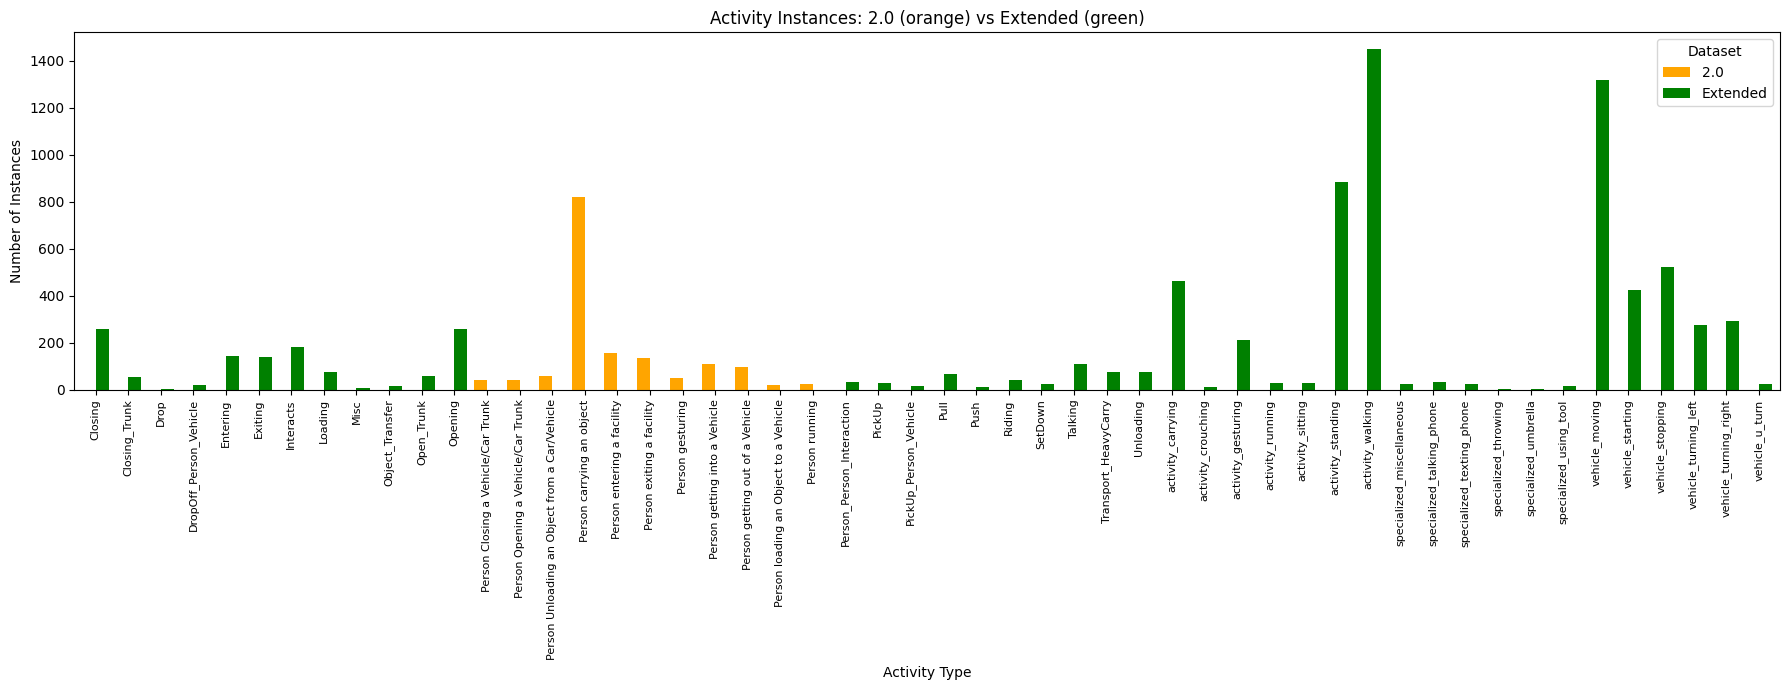

In [11]:
import matplotlib.pyplot as plt

ax = df.plot(
    kind='bar',
    figsize=(18, 7),
    width=0.8,
    color=['orange', 'green']
)
plt.xlabel('Activity Type')
plt.ylabel('Number of Instances')
plt.title('Activity Instances: 2.0 (orange) vs Extended (green)')
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


In [ ]:
import json
import pandas as pd
import re

prefixes = [
    'VIRAT_S_0000',
    'VIRAT_S_0001',
    'VIRAT_S_0002',
    'VIRAT_S_0100',
    'VIRAT_S_0101',
    'VIRAT_S_0102',
    'VIRAT_S_0400',
    'VIRAT_S_0401',
    'VIRAT_S_0500',
    'VIRAT_S_0501',
    'VIRAT_S_0502',
    'VIRAT_S_0503'
]

def extract_prefix(source):
    # Extract "VIRAT_S_XXXX" from the source path
    m = re.search(r'(VIRAT_S_\d{4})', source)
    return m.group(1) if m else None

def count_activities_by_prefix(file_path, prefixes):
    with open(file_path, 'r') as f:
        data = json.load(f)
    counts = {p: 0 for p in prefixes}
    for v in data.values():
        source = v.get('source', '')
        prefix = extract_prefix(source)
        if prefix in counts:
            counts[prefix] += 1
    return counts



# Count for both files
counts_a = count_activities_by_prefix(file_a_path, prefixes)
counts_b = count_activities_by_prefix(file_b_path, prefixes)

# Build DataFrame
df = pd.DataFrame({
    'Num of Activities from file 2.0': [counts_a[p] for p in prefixes],
    'Num of Activities from file Extended': [counts_b[p] for p in prefixes]
}, index=prefixes)

df


,Num of Activities from file 2.0,Num of Activities from file Extended
VIRAT_S_0000,64,1394
VIRAT_S_0001,104,0
VIRAT_S_0002,107,2437
VIRAT_S_0100,365,0
VIRAT_S_0101,59,0
VIRAT_S_0102,425,0
VIRAT_S_0400,90,1011
VIRAT_S_0401,109,2150
VIRAT_S_0500,108,712
VIRAT_S_0501,0,0


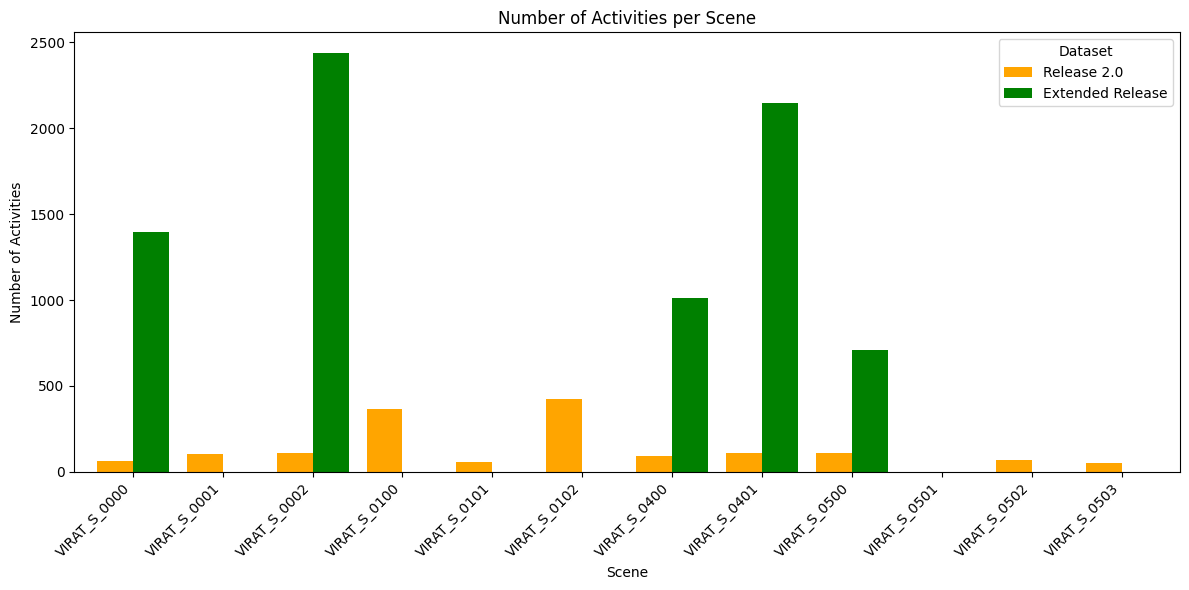

In [15]:
import matplotlib.pyplot as plt

ax = df.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.8,
    color=['orange', 'green']
)
plt.xlabel('Scene')
plt.ylabel('Number of Activities')
plt.title('Number of Activities per Scene')
plt.xticks(rotation=45, ha='right')
plt.legend(['Release 2.0', 'Extended Release'], title='Dataset')
plt.tight_layout()
plt.show()


### Merge both files, and remove incomplete events (trajectory information for at least 10 frames)

In [ ]:
import json
import copy

file_a_path = '/home/norm/workspace/CameraAsWitness/files/intial preprocessing V0/trajectories_V0_2.0.json'
file_b_path = '/home/norm/workspace/CameraAsWitness/files/intial preprocessing V0/trajectories_V0_Extended.json'
output_path = 'trajectories_v1.json'

def filter_by_trajectory_length(merged, min_frames=10):
    filtered = {}
    for key, event in merged.items():
        if "trajectory" in event:
            if any(len(actor.get("bbox_per_frame", [])) >= min_frames for actor in event["trajectory"]):
                filtered[key] = event
    return filtered

with open(file_a_path, 'r') as fa:
    a = json.load(fa)
with open(file_b_path, 'r') as fb:
    b = json.load(fb)

merged = {}

for k, v in a.items():
    v_new = copy.deepcopy(v)
    v_new["dataset"] = "Release 2.0"
    merged[k] = v_new

for k, v in b.items():
    v_new = copy.deepcopy(v)
    v_new["dataset"] = "Extended Release"
    merged[k] = v_new

v1 = filter_by_trajectory_length(merged, min_frames=10)


with open(output_path, 'w') as fout:
    json.dump(v1, fout, indent=2)

print(f"Original merged size: {len(merged)}")
print(f"Filtered size: {len(v1)}")
print(f"Saved to: {output_path}")


Original merged size: 9259
Filtered size: 6930
Saved to: trajectories_v1.json


In [35]:
import pandas as pd

def activity_count_dict(data):
    counts = {}
    for item in data.values():
        activity = item.get("activity")
        if activity:
            counts[activity] = counts.get(activity, 0) + 1
    return counts


counts = activity_count_dict(v1)  

df = pd.DataFrame(
    {"num_instances": list(counts.values())},
    index=list(counts.keys())
).sort_index()

df


,num_instances
Closing,188
Closing_Trunk,31
Drop,1
DropOff_Person_Vehicle,15
Entering,106
Exiting,108
Interacts,173
Loading,63
Misc,5
Object_Transfer,14


In [20]:
len(df)

52

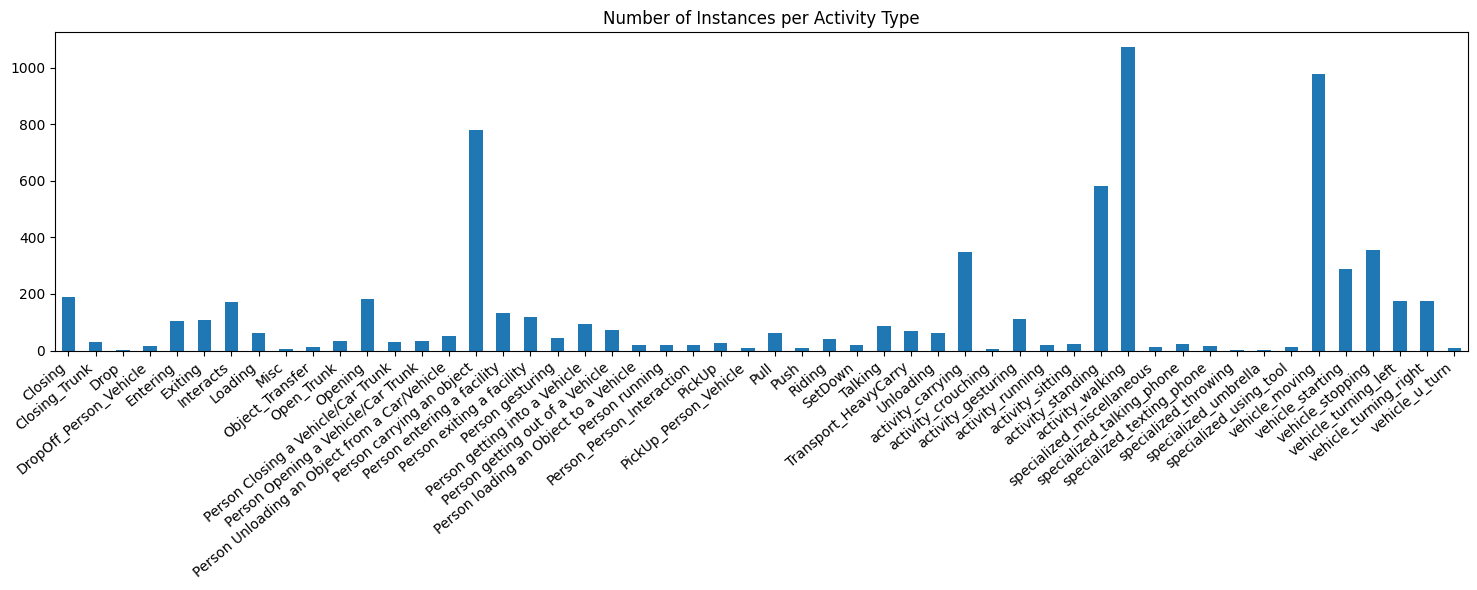

In [36]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(15, 6))
df['num_instances'].plot(kind='bar')
plt.title('Number of Instances per Activity Type')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()


## Keep only a subset of 23 activities that might be interesting

    Person loading object to vehicle; Person getting into vehicle; Person unloading object from vehicle; Person getting out of vehicle; Person entering facility; Person exiting facility; Person running; Exiting; Opening; Closing; activity standing; vehicle stopping; activity walking; vehicle turning right; vehicle moving; activity carrying; vehicle starting; vehicle turning left; activity running; Unloading; Loading; Entering; vehicle u turn



In [41]:
import json

activity_list = [
    "Closing",
    "Closing_Trunk",
    "DropOff_Person_Vehicle",
    "Entering",
    "Exiting",
    "Interacts",
    "Loading",
    "Object_Transfer",
    "Open_Trunk",
    "Opening",
    "Person Closing a Vehicle/Car Trunk",
    "Person Opening a Vehicle/Car Trunk",
    "Person Unloading an Object from a Car/Vehicle",
    "Person carrying an object",
    "Person entering a facility",
    "Person exiting a facility",
    "Person gesturing",
    "Person getting into a Vehicle",
    "Person getting out of a Vehicle",
    "Person loading an Object to a Vehicle",
    "Person running",
    "Person_Person_Interaction",
    "PickUp",
    "PickUp_Person_Vehicle",
    "Pull",
    "Push",
    "Riding",
    "Talking",
    "Transport_HeavyCarry",
    "Unloading",
    "activity_carrying",
    "activity_crouching",
    "activity_gesturing",
    "activity_running",
    "activity_sitting",
    "activity_standing",
    "activity_walking",
    "vehicle_moving",
    "vehicle_starting",
    "vehicle_stopping",
    "vehicle_turning_left",
    "vehicle_turning_right",
    "vehicle_u_turn"
]




def filter_by_activity(merged):
    filtered = {}
    for key, event in merged.items():
        activity = event.get("activity", "")
        if activity in activity_list:
            filtered[key] = event
    return filtered


v1_path = "trajectories_v1.json"
with open(v1_path, 'r') as v:
    v1 = json.load(v)

output_path = 'trajectories_v2.json'
v2 = filter_by_activity(v1)

with open(output_path, 'w') as filt:
    json.dump(v2, filt, indent=2)

print(f"Original size: {len(v1)}")
print(f"size: {len(v2)}")


Original size: 6930
size: 6838


In [4]:
import pandas as pd
import json 

v2 = json.load(open('trajectories_v2.json', 'r'))

def activity_count_dict(data):
    counts = {}
    for item in data.values():
        activity = item.get("activity")
        if activity:
            counts[activity] = counts.get(activity, 0) + 1
    return counts


counts = activity_count_dict(v2)  

df = pd.DataFrame(
    {"num_instances": list(counts.values())},
    index=list(counts.keys())
).sort_index()

df

,num_instances
Closing,188
Closing_Trunk,31
DropOff_Person_Vehicle,15
Entering,106
Exiting,108
Interacts,173
Loading,63
Object_Transfer,14
Open_Trunk,33
Opening,181


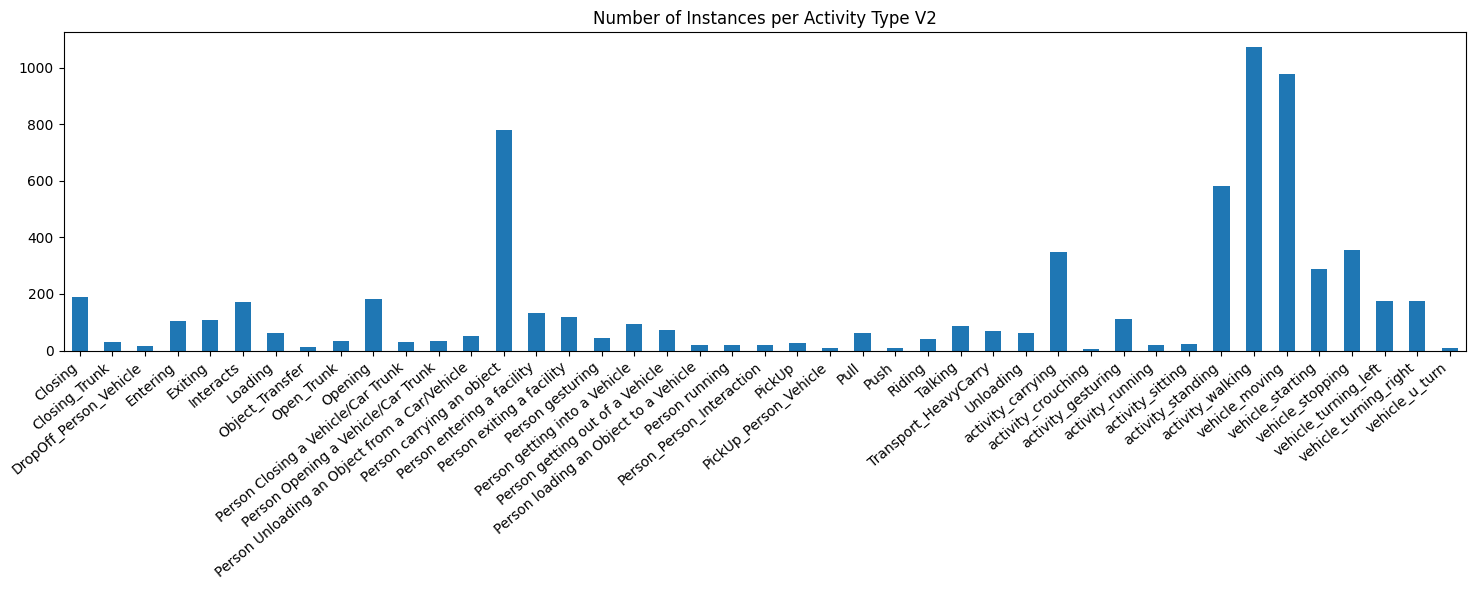

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(15, 6))
df['num_instances'].plot(kind='bar')
plt.title('Number of Instances per Activity Type V2')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

## After the manual relabelling process

In [49]:
import json

# Paths
v3_path = "/home/norm/workspace/CameraAsWitness/files/dataset_versions/trajectories_V3.json"
v2_path = "/home/norm/workspace/TFG/Dataset-Generation/trajectories_v2.json"
output_path = "/home/norm/workspace/TFG/Dataset-Generation/trajectories_v3.json"

activities = {
    "vehicle_turning_left",
    "vehicle_turning_right",
    "vehicle_u_turn",
    "vehicle_moving_forward",
    "vehicle_moving_backward"
}

# Load V3 and V2
with open(v3_path) as f:
    v3 = json.load(f)
with open(v2_path) as f:
    v2 = json.load(f)

# Check and add
added = 0
for k, v in v3.items():
    if v.get("activity") in activities:
        # Either key does not exist, or activity is not the same
        if (k not in v2) or (v2[k].get("activity") != v.get("activity")):
            v2[k] = dict(v)
            v2[k]["dataset"] = "Relabelled"
            added += 1

with open(output_path, "w") as f:
    json.dump(v2, f, indent=2)

print(f"Added {added}")



Added 403


In [53]:
import json

input_path = "/home/norm/workspace/TFG/Dataset-Generation/trajectories_v3.json"
v3_path = "/home/norm/workspace/CameraAsWitness/files/dataset_versions/trajectories_V3.json"
output_path = "/home/norm/workspace/TFG/Dataset-Generation/trajectories_v3.json"

# Load files
with open(input_path) as f:
    input = json.load(f)
with open(v3_path) as f:
    v3 = json.load(f)

# Remove "vehicle_moving" events not present in V3
to_remove = []
for k, v in input.items():
    if v.get("activity") == "vehicle_moving" and k not in v3:
        to_remove.append(k)

for k in to_remove:
    del input[k]

with open(output_path, "w") as f:
    json.dump(input, f, indent=2)

print(f"Removed {len(to_remove)} 'vehicle_moving' activities not in V3.")



Removed 576 'vehicle_moving' activities not in V3.


## Vehicle Centric Subset

### Small

In [77]:
import json
import random

activity_list = [
    "Person getting into a Vehicle",
    "Person getting out of a Vehicle",
    "activity_walking", # only 150 random
    "vehicle_turning_left",
    "vehicle_turning_right",
    "vehicle_u_turn",
    "vehicle_moving_forward",
    "vehicle_moving_backward"
]

def filter_by_activity_random_walking(merged, n_walking=150, seed=42):

    walking_keys = []
    other_keys = []
    for key, event in merged.items():
        activity = event.get("activity", "")
        if activity == "activity_walking":
            walking_keys.append(key)
        elif activity in activity_list and activity != "activity_walking":
            other_keys.append(key)

    random.seed(seed)
    walking_selected = random.sample(walking_keys, min(n_walking, len(walking_keys)))

    filtered = {key: merged[key] for key in walking_selected + other_keys}
    return filtered

v3_path = "trajectories_v3.json"
with open(v3_path, 'r') as v:
    v3 = json.load(v)

output_path = 'trajectories_v4.json'
v4 = filter_by_activity_random_walking(v3, n_walking=150)

with open(output_path, 'w') as filt:
    json.dump(v4, filt, indent=2)

print(f"Original size: {len(v3)}")
print(f"Filtered size: {len(v4)}")


Original size: 6262
Filtered size: 1077


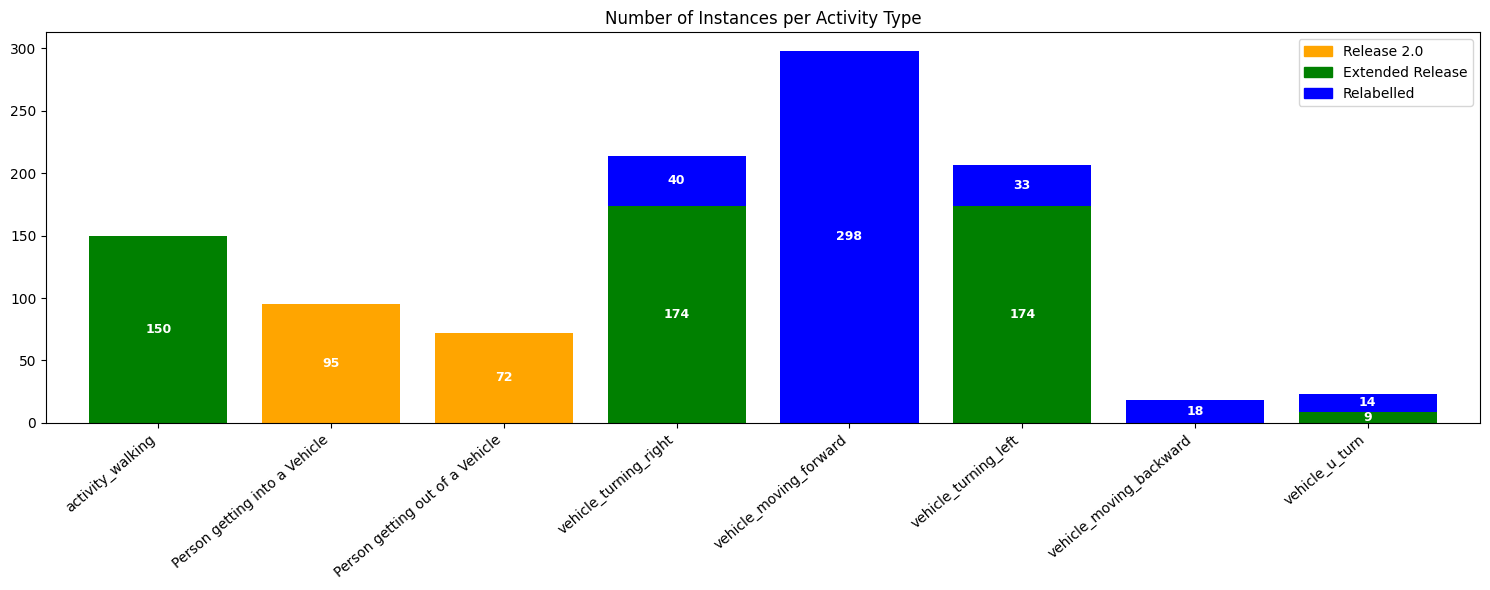

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json

v4 = json.load(open("trajectories_v4.json", 'r'))

def activity_dataset_counts(data):
    counts = {}  
    for item in data.values():
        activity = item.get("activity")
        dataset = item.get("dataset", "unknown")
        if activity:
            if activity not in counts:
                counts[activity] = {"Release 2.0": 0, "Extended Release": 0, "Relabelled": 0, "unknown": 0}
            counts[activity][dataset] = counts[activity].get(dataset, 0) + 1
    return counts

counts = activity_dataset_counts(v4)

df = pd.DataFrame(counts).T.fillna(0).astype(int)
df = df[["Release 2.0", "Extended Release", "Relabelled"]] 
df = df.loc[(df.sum(axis=1) > 0)]  

colors = ["orange", "green", "blue"]
ax = df.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(15, 6),
    width=0.8
)
plt.title('Number of Instances per Activity Type')
plt.xticks(rotation=40, ha='right')

for i, activity in enumerate(df.index):
    cumulative = 0
    for j, dataset in enumerate(df.columns):
        count = df.loc[activity, dataset]
        if count > 0:
            ax.text(i, cumulative + count/2, str(count), ha='center', va='center', color='white', fontsize=9, fontweight='bold')
            cumulative += count

from matplotlib.patches import Patch
plt.legend(handles=[
    Patch(color="orange", label="Release 2.0"),
    Patch(color="green", label="Extended Release"),
    Patch(color="blue", label="Relabelled")
])
plt.tight_layout()
plt.show()


In [ ]:
import json
import pandas as pd
import re

# Your prefixes of interest
prefixes = [
    'VIRAT_S_0000',
    'VIRAT_S_0001',
    'VIRAT_S_0002',
    'VIRAT_S_0100',
    'VIRAT_S_0101',
    'VIRAT_S_0102',
    'VIRAT_S_0400',
    'VIRAT_S_0401',
    'VIRAT_S_0500',
    'VIRAT_S_0501',
    'VIRAT_S_0502',
    'VIRAT_S_0503'
]

def extract_prefix(source):
    m = re.search(r'(VIRAT_S_\d{4})', source)
    return m.group(1) if m else None

def count_activities_by_prefix(file_path, prefixes):
    with open(file_path, 'r') as f:
        data = json.load(f)
    counts = {p: 0 for p in prefixes}
    for v in data.values():
        source = v.get('source', '')
        prefix = extract_prefix(source)
        if prefix in counts:
            counts[prefix] += 1
    return counts




counts_a = count_activities_by_prefix("/home/norm/workspace/TFG/Dataset-Generation/trajectories_v4.json", prefixes)


df = pd.DataFrame({
    'Num of Activities Per Scene': [counts_a[p] for p in prefixes],
}, index=prefixes)

df


,Num of Activities Per Scene
VIRAT_S_0000,118
VIRAT_S_0001,8
VIRAT_S_0002,465
VIRAT_S_0100,0
VIRAT_S_0101,18
VIRAT_S_0102,2
VIRAT_S_0400,155
VIRAT_S_0401,134
VIRAT_S_0500,134
VIRAT_S_0501,0


### Big

In [95]:
import json

activity_list = [
    "Closing_Trunk",
    "DropOff_Person_Vehicle",
    "Open_Trunk",
    "Person Closing a Vehicle/Car Trunk",
    "Person Opening a Vehicle/Car Trunk",
    "Person Unloading an Object from a Car/Vehicle",
    "Person getting into a Vehicle",
    "Person getting out of a Vehicle",
    "Person loading an Object to a Vehicle",
    "PickUp_Person_Vehicle",
    "activity_walking", # extra for negative answers 150
    "vehicle_starting",
    "vehicle_stopping",
    "vehicle_turning_left",
    "vehicle_turning_right",
    "vehicle_u_turn",
    "vehicle_moving_forward",
    "vehicle_moving_backward"
]



v3_path = "trajectories_v3.json"
with open(v3_path, 'r') as v:
    v3 = json.load(v)

output_path = 'trajectories_v5.json'
v5 = filter_by_activity_random_walking(v3, n_walking=150)

with open(output_path, 'w') as filt:
    json.dump(v5, filt, indent=2)

print(f"Original size: {len(v3)}")
print(f"Filtered size: {len(v5)}")

Original size: 6262
Filtered size: 1947


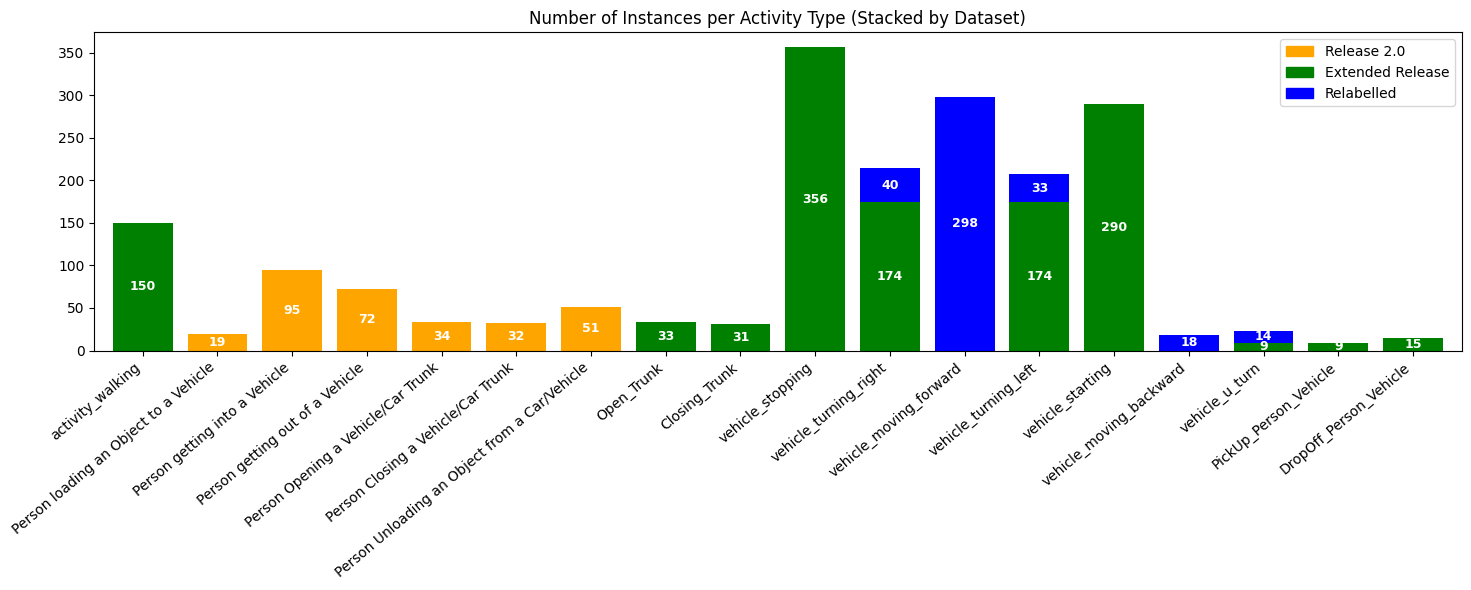

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def activity_dataset_counts(data):
    counts = {}  
    for item in data.values():
        activity = item.get("activity")
        dataset = item.get("dataset", "unknown")
        if activity:
            if activity not in counts:
                counts[activity] = {"Release 2.0": 0, "Extended Release": 0, "Relabelled": 0, "unknown": 0}
            counts[activity][dataset] = counts[activity].get(dataset, 0) + 1
    return counts

counts = activity_dataset_counts(v5)

df = pd.DataFrame(counts).T.fillna(0).astype(int)
df = df[["Release 2.0", "Extended Release", "Relabelled"]] 
df = df.loc[(df.sum(axis=1) > 0)] 


colors = ["orange", "green", "blue"]
ax = df.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(15, 6),
    width=0.8
)
plt.title('Number of Instances per Activity Type (Stacked by Dataset)')
plt.xticks(rotation=40, ha='right')


for i, activity in enumerate(df.index):
    cumulative = 0
    for j, dataset in enumerate(df.columns):
        count = df.loc[activity, dataset]
        if count > 0:
            ax.text(i, cumulative + count/2, str(count), ha='center', va='center', color='white', fontsize=9, fontweight='bold')
            cumulative += count

from matplotlib.patches import Patch
plt.legend(handles=[
    Patch(color="orange", label="Release 2.0"),
    Patch(color="green", label="Extended Release"),
    Patch(color="blue", label="Relabelled")
])
plt.tight_layout()
plt.show()
